<a href="https://colab.research.google.com/github/PriyankaGPawar/MachineLearningWith_Python/blob/master/Practice/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [0]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
X.ndim

2

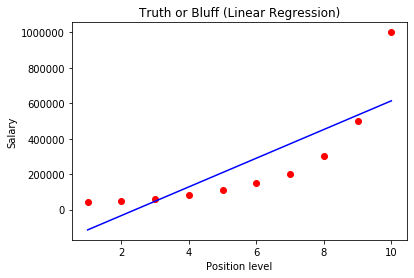

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [0]:
#y_pred_train= lin_reg.predict(X_train)
y_pred_train = lin_reg.predict(X_train)

In [0]:
y_pred_test= lin_reg.predict(X_test)

In [0]:
#y_pred_train
y_pred_test   # ([ 47303.03030303, 532575.75757576])
y_test

array([ 60000, 500000])

In [0]:
## calculate the accuracy of the linear regression model
from sklearn import metrics

RMSE_test = metrics.mean_squared_error(y_pred_train, y_train)
print('RMSE for y_train is :{}'.format(RMSE_test))

RMSE for y_train is :33217049357.208443


In [0]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [0]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 154909.0909090909
MAE for test set is 22636.363636363647


In [0]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [0]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 33217049357.208443
MSE for test set is 611196510.560147


In [0]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [0]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 182255.45082989548
RMSE for test set is 24722.388852215456


Let's do the gridsearch and try finding best parameters for linear reg model

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'normalize':[True,False], 'copy_X':[True,False] , 'fit_intercept':[True, False] }
linreg =LinearRegression()
linreg1=GridSearchCV(linreg,parameters)
linreg1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print('best_score: ',linreg1.best_score_)

best_score:  nan


In [0]:
linreg1.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

RMSE for the test set is 1068599327.5148343


In [0]:
print('Intercept:',linreg.intercept_)                    # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -205322.8962818004
Coefficients: [83199.60861057]


In [0]:
y_pred_train = linreg.predict(X_train)  

In [0]:
y_pred_test = linreg.predict(X_test) 

In [0]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))  

RMSE for training set is 182120.4803798214
RMSE for test set is 32689.437552745294


In [0]:
# Let's do polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)

X_poly = poly_reg.fit_transform(X)
pol_reg=LinearRegression()

pol_reg.fit(X_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

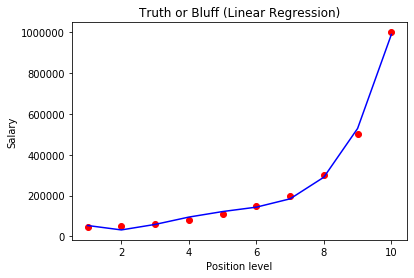

In [0]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [0]:
lin_reg.predict([[5.5]])
#output should be 249500

array([249500.])

In [0]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43750002])